In [1]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report   

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (768, 9)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.describe(include ='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

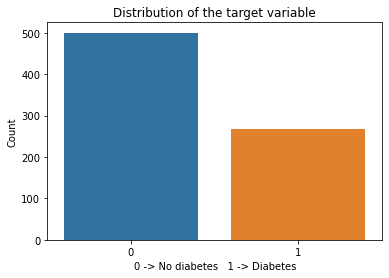

In [11]:
# Creating a countplot to visualize the distribution of 'Outcome' values
sns.countplot(x='Outcome', data=data)

# Adding a label to the x-axis
plt.xlabel('0 -> No diabetes   1 -> Diabetes')

# Adding a label to the y-axis
plt.ylabel('Count')

# Setting the title of the plot
plt.title('Distribution of the target variable')

# Displaying the plot
plt.show()

In [12]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


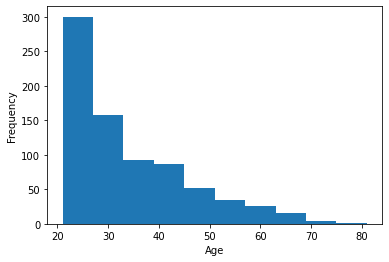

In [13]:
# Creating a histogram to visualize the distribution of the 'Age' variable
plt.hist(data['Age'])

# Adding a label to the x-axis
plt.xlabel('Age')

# Adding a label to the y-axis
plt.ylabel('Frequency')

# Display the histogram plot
plt.show()


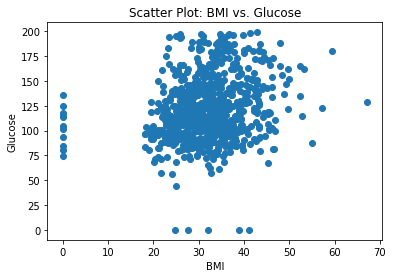

In [14]:
# Creating a scatter plot to visualize the relationship between 'BMI' and 'Glucose'
plt.scatter(data['BMI'], data['Glucose'])

# Adding a label to the x-axis
plt.xlabel('BMI')

# Adding a label to the y-axis
plt.ylabel('Glucose')

# Adding a title to the plot
plt.title('Scatter Plot: BMI vs. Glucose')

# Display the scatter plot
plt.show()

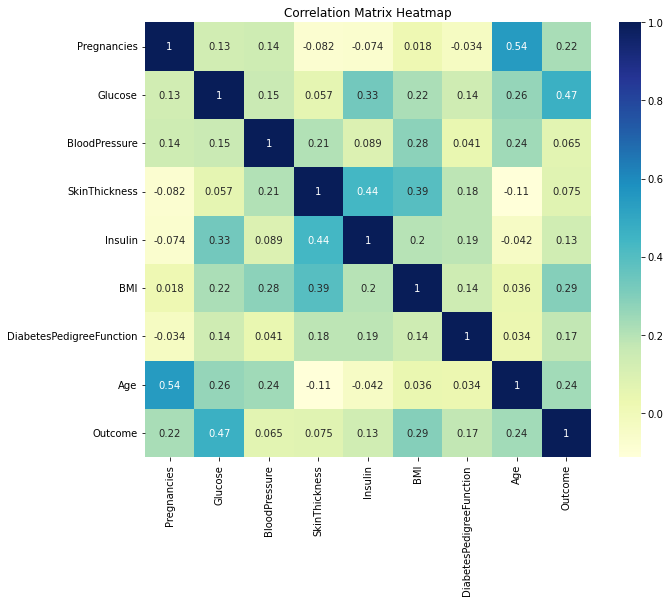

In [15]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

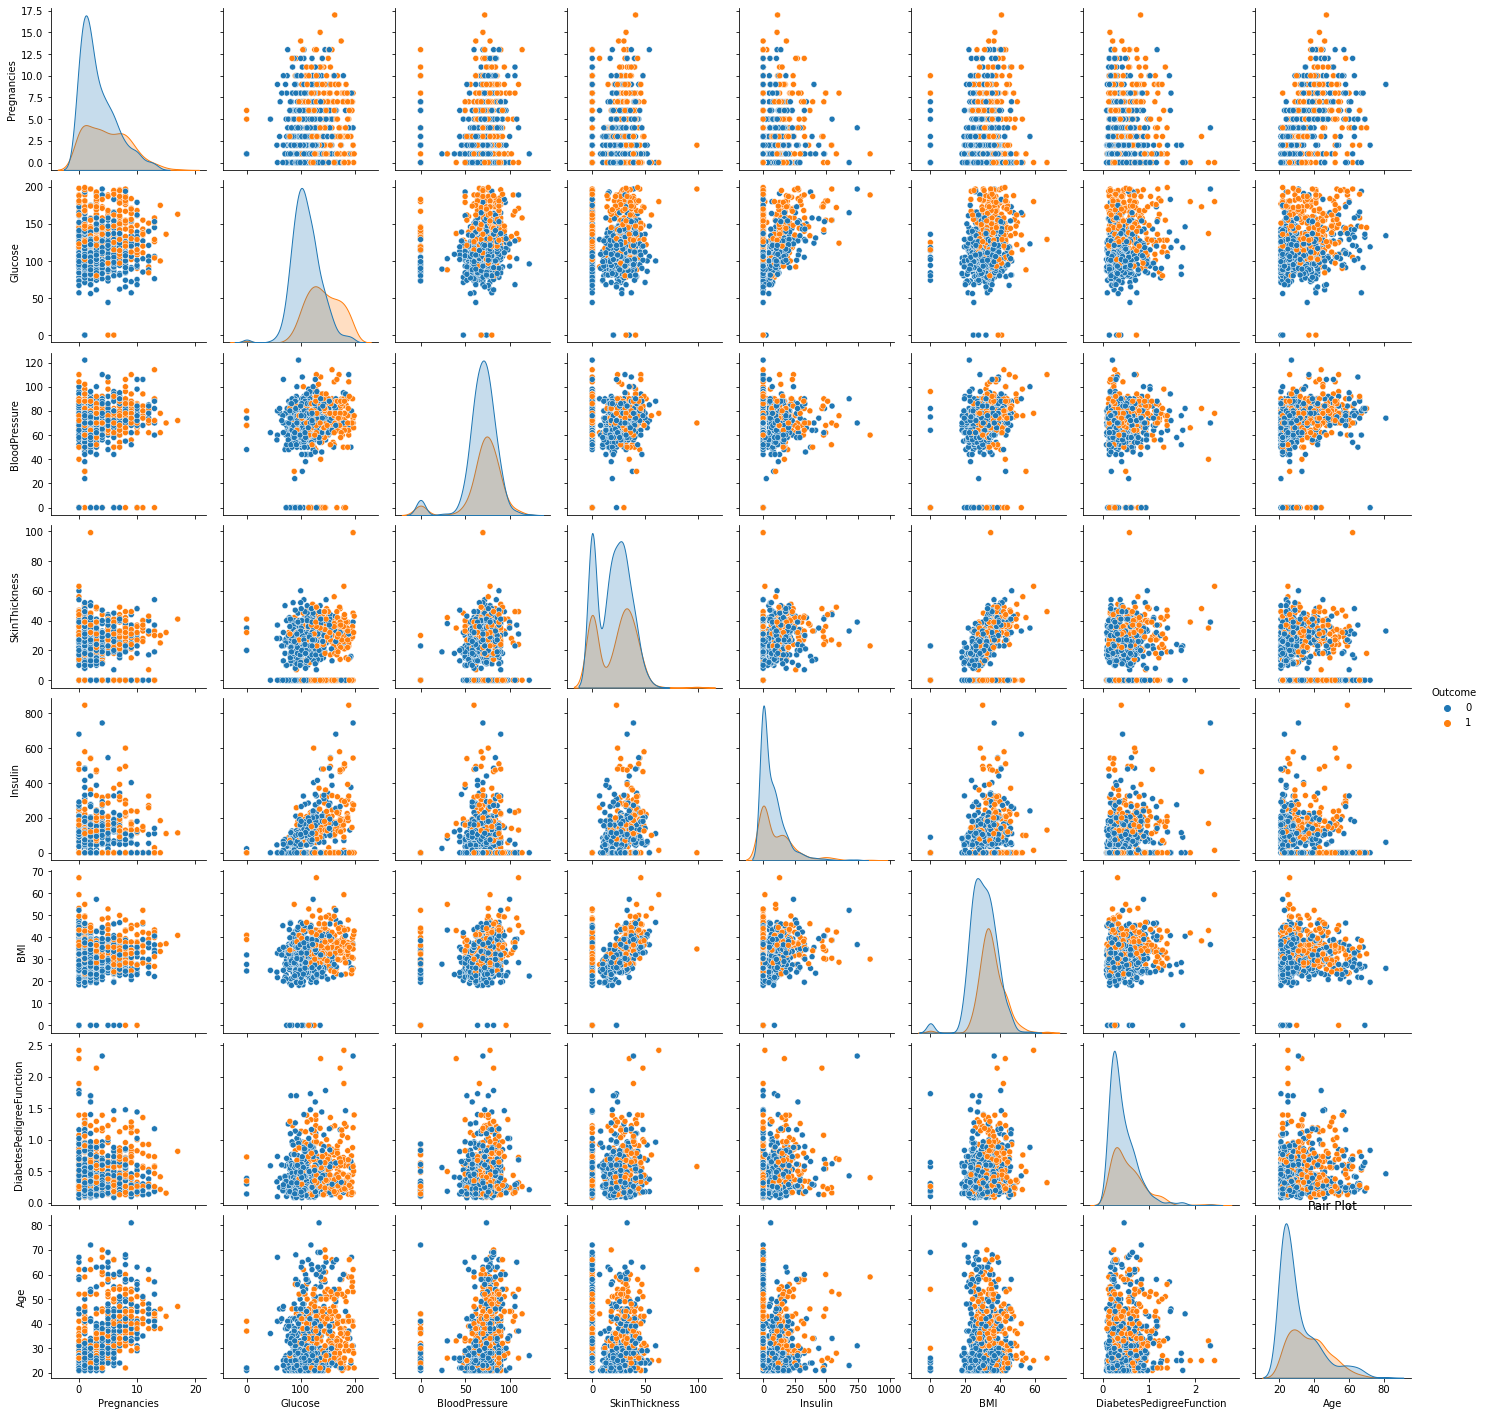

In [16]:
# Creating a pair plot to visualize pairwise relationships between variables, with 'Outcome' as the hue
sns.pairplot(data, hue='Outcome')

# Adding a title to the plot
plt.title('Pair Plot')

# Display the pair plot
plt.show()

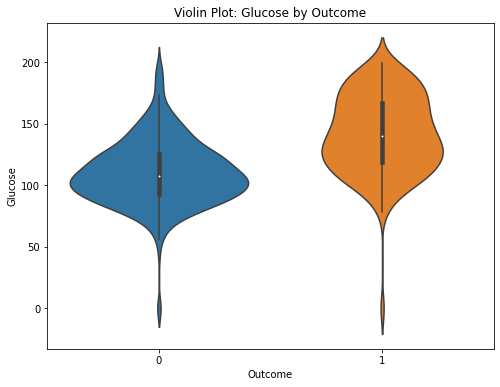

In [17]:
# Set the figure size for the violin plot
plt.figure(figsize=(8, 6))

# Creating a violin plot to visualize the distribution of 'Glucose' by 'Outcome'
sns.violinplot(x='Outcome', y='Glucose', data=data)

# Adding a label to the x-axis
plt.xlabel('Outcome')

# Adding a label to the y-axis
plt.ylabel('Glucose')

# Adding a title to the plot
plt.title('Violin Plot: Glucose by Outcome')

# Display the violin plot
plt.show()

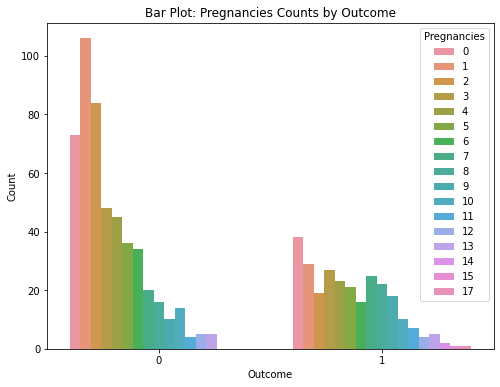

In [18]:
# Setting the figure size for the count plot
plt.figure(figsize=(8, 6))

# Creating a count plot with hue to visualize 'Pregnancies' counts by 'Outcome'
sns.countplot(x='Outcome', hue='Pregnancies', data=data)

# Adding a label to the x-axis
plt.xlabel('Outcome')

# Adding a label to the y-axis
plt.ylabel('Count')

# Adding a title to the plot
plt.title('Bar Plot: Pregnancies Counts by Outcome')

# Display the count plot
plt.show()

In [19]:
# Creating the feature variables by dropping the 'Outcome' column
X = data.drop(columns='Outcome', axis=1)

# Creating the target variable
Y = data['Outcome']

In [20]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X)

StandardScaler()

In [24]:
standardized_data = scaler.transform(X)
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [25]:
# Assigning the standardized feature variables to X
X = standardized_data

# Assigning the 'Outcome' column from the diabetes_dataset DataFrame to Y
Y = data['Outcome']

In [26]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [27]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print("Shape of X:", X.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X: (768, 8)
Shape of X_train: (614, 8)
Shape of X_test: (154, 8)


In [30]:
SVM = SVC(kernel='rbf', random_state=0)

In [31]:
SVM.fit(X_train, Y_train)

SVC(random_state=0)

In [32]:
training_data_accuracy = SVM.score(X_train, Y_train)

# Print the accuracy score of the training data
print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.8306188925081434


In [33]:
testing_data_accuracy = SVM.score(X_test, Y_test)

# Print the accuracy score of the testing data
print('Accuracy score of the testing data:', testing_data_accuracy)

Accuracy score of the testing data: 0.7402597402597403


In [34]:
y_predict = SVM.predict(X_test)

# Computing the confusion matrix
confusion_matrix(Y_test,y_predict)

# Creating a cross-tabulation table
pd.crosstab(Y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,93,16,109
1,24,21,45
All,117,37,154


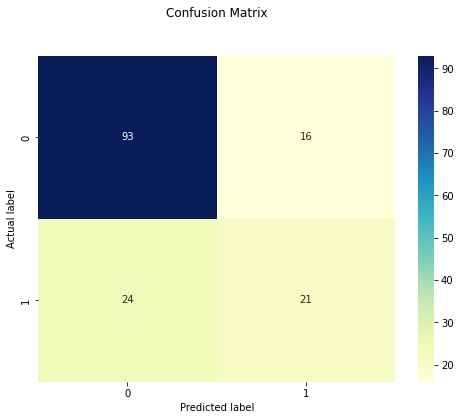

In [35]:
cnf_matrix = confusion_matrix(Y_test, y_predict)

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Setting the title of the heatmap
plt.title('Confusion Matrix', y=1.1)

# Setting the label for the y-axis
plt.ylabel('Actual label')

# Setting the label for the x-axis
plt.xlabel('Predicted label')

# Displaying the heatmap
plt.show()


In [36]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       109
           1       0.57      0.47      0.51        45

    accuracy                           0.74       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.73      0.74      0.73       154



In [37]:
# Defining the input data
input_data = (5, 116, 74, 0, 175, 25.8, 0.587, 51)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print("Standardized input data:", std_data)

# Make the prediction using the SVM model
prediction = SVM.predict(std_data)
print("Prediction:", prediction)

# Print the result based on the prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

Standardized input data: [[ 0.3429808  -0.15318486  0.25303625 -1.28821221  0.82661621 -0.78595734
   0.34768723  1.51108316]]
Prediction: [0]
The person is not diabetic
